In [1]:
import numpy as np
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import os
import json
from konlpy.tag import Okt
import pymysql.cursors
import pandas as pd
import re
import tensorflow as tf
from tensorflow import keras

In [2]:
conn = pymysql.connect(host='localhost',
                       user='lyunj',
                       password='Dldbswo77@',
                       db='coupang_review',  # coupang_review 스키마 생성 필요
                       charset='utf8',
                       cursorclass=pymysql.cursors.DictCursor)
try:
    with conn.cursor() as curs:
        sql = 'select *,(pow(if(special_char_count = 0,1,special_char_count),2) + pow(if(manufacturer_count = 0,1,manufacturer_count),2) + pow(if(product_count = 0,1,product_count),2)) / if(review_len = 0, 1, review_len) as c1 from review_analyzing_data where review_len <> 0 and not isnull(review_score)'
        curs.execute(sql)
        result = curs.fetchall()
        df = pd.DataFrame(result)
finally:
    conn.close()

In [3]:
df.head()

,product_review_index,product_index,category_index,review_date,review_rating,newline_count,review_len,special_char_count,manufacturer_count,product_count,review_score,c1
0,0,1,3,2017-08-06,1,0,108,0,0,0,47,0.027778
1,0,6663,6665,2021-02-12,1,0,18,0,0,0,7,0.166667
2,0,21715,21717,2019-03-24,1,37,954,2,0,0,3,0.006289
3,0,42617,42619,2017-05-14,1,2,735,5,0,3,99,0.047619
4,0,61420,61422,2020-03-18,1,20,217,3,4,5,98,0.230415


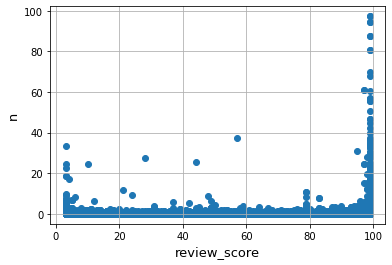

In [4]:
plt.scatter(df['review_score'],df['c1'])
plt.xlabel("review_score", fontsize=13)
plt.ylabel("n", fontsize=13)
plt.grid()
plt.show()

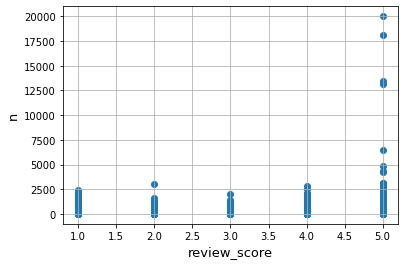

In [10]:
plt.scatter(df['review_rating'],df['review_len'])
plt.xlabel("review_score", fontsize=13)
plt.ylabel("n", fontsize=13)
plt.grid()
plt.show()

In [6]:
rs = df[df['review_score']  == 99]

In [7]:
rs.head()

,product_review_index,product_index,category_index,review_date,review_rating,newline_count,review_len,special_char_count,manufacturer_count,product_count,review_score,c1
3,0,42617,42619,2017-05-14,1,2,735,5,0,3,99,0.047619
9,0,128217,128219,2018-12-24,1,13,685,25,0,3,99,0.927007
16,1,21715,21717,2019-09-28,1,19,467,0,0,0,99,0.006424
20,1,86121,86123,2020-02-28,1,10,256,1,0,4,99,0.070312
22,1,118165,118167,2020-12-23,1,2,391,0,0,0,99,0.007673


In [8]:
rs.groupby('review_rating').count()

,product_review_index,product_index,category_index,review_date,newline_count,review_len,special_char_count,manufacturer_count,product_count,review_score,c1
review_rating,,,,,,,,,,,
1,280,280,280,280,280,280,280,280,280,280,280
2,443,443,443,443,443,443,443,443,443,443,443
3,1307,1307,1307,1307,1307,1307,1307,1307,1307,1307,1307
4,9313,9313,9313,9313,9313,9313,9313,9313,9313,9313,9313
5,27130,27130,27130,27130,27130,27130,27130,27130,27130,27130,27130


In [9]:
df.groupby('review_rating').count()

,product_review_index,product_index,category_index,review_date,newline_count,review_len,special_char_count,manufacturer_count,product_count,review_score,c1
review_rating,,,,,,,,,,,
1,19040,19040,19040,19040,19040,19040,19040,19040,19040,19040,19040
2,12370,12370,12370,12370,12370,12370,12370,12370,12370,12370,12370
3,13540,13540,13540,13540,13540,13540,13540,13540,13540,13540,13540
4,39684,39684,39684,39684,39684,39684,39684,39684,39684,39684,39684
5,56990,56990,56990,56990,56990,56990,56990,56990,56990,56990,56990
